Install required packages

In [3]:
install.packages("devtools")
devtools::install_github("guido-s/meta")

library(meta)
# library(metafor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'meta' from a github remote, the SHA1 (511c76c8) has not changed since last install.
  Use `force = TRUE` to force installation



Read data from csv file

In [5]:
our_data <- read.csv('sources_for_ma5.csv')
our_data

Study,Year,num_methods_before,num_methods_after,mean_before,std_before,mean_after,std_after,type
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Fontana et al. (Data_Class),2012,12,12,53745.8333,19671.835,53466.709,19542.397,M_5_1
Fontana et al. (God_Class),2012,12,12,53745.8333,19671.835,53751.468,19634.294,M_5_2
Mehta et al.,2018,12,12,962.2727,374.941,1111.909,374.941,M_9
Guggulothu and Moiz,2019,2,2,6088.0000,1006.000,5535.000,1006.000,M_11
Martins et al.,2020,3,3,4.0000,0.000,3.000,0.000,M_13


Explore the data

In [ ]:
str(our_data) #structure of our dataset

'data.frame':	5 obs. of  9 variables:
 $ Study             : chr  "Fontana et al. (Data_Class)" "Fontana et al. (God_Class)" "Mehta et al." "Guggulothu and Moiz" ...
 $ Year              : int  2012 2012 2018 2019 2020
 $ num_methods_before: int  12 12 12 2 3
 $ num_methods_after : int  12 12 12 2 3
 $ mean_before       : num  53746 53746 962 6088 4
 $ std_before        : num  19672 19672 375 1006 0
 $ mean_after        : num  53467 53751 1112 5535 3
 $ std_after         : num  19542 19634 375 1006 0
 $ type              : chr  "M_5_1" "M_5_2" "M_9" "M_11" ...


In [ ]:
min(our_data$num_methods_after) #minimum number of experiments done in the included papers

[1] 2

In [ ]:
summary(our_data) #the descriptive statistics of our dataset

    Study                Year      num_methods_before num_methods_after
 Length:5           Min.   :2012   Min.   : 2.0       Min.   : 2.0     
 Class :character   1st Qu.:2012   1st Qu.: 3.0       1st Qu.: 3.0     
 Mode  :character   Median :2018   Median :12.0       Median :12.0     
                    Mean   :2016   Mean   : 8.2       Mean   : 8.2     
                    3rd Qu.:2019   3rd Qu.:12.0       3rd Qu.:12.0     
                    Max.   :2020   Max.   :12.0       Max.   :12.0     
  mean_before        std_before        mean_after      std_after      
 Min.   :    4.0   Min.   :    0.0   Min.   :    3   Min.   :    0.0  
 1st Qu.:  962.3   1st Qu.:  374.9   1st Qu.: 1112   1st Qu.:  374.9  
 Median : 6088.0   Median : 1006.0   Median : 5535   Median : 1006.0  
 Mean   :22909.2   Mean   : 8144.9   Mean   :22774   Mean   : 8111.5  
 3rd Qu.:53745.8   3rd Qu.:19671.8   3rd Qu.:53467   3rd Qu.:19542.4  
 Max.   :53745.8   Max.   :19671.8   Max.   :53751   Max.   :19634.3  

Perform meta analysis -- Random effects model

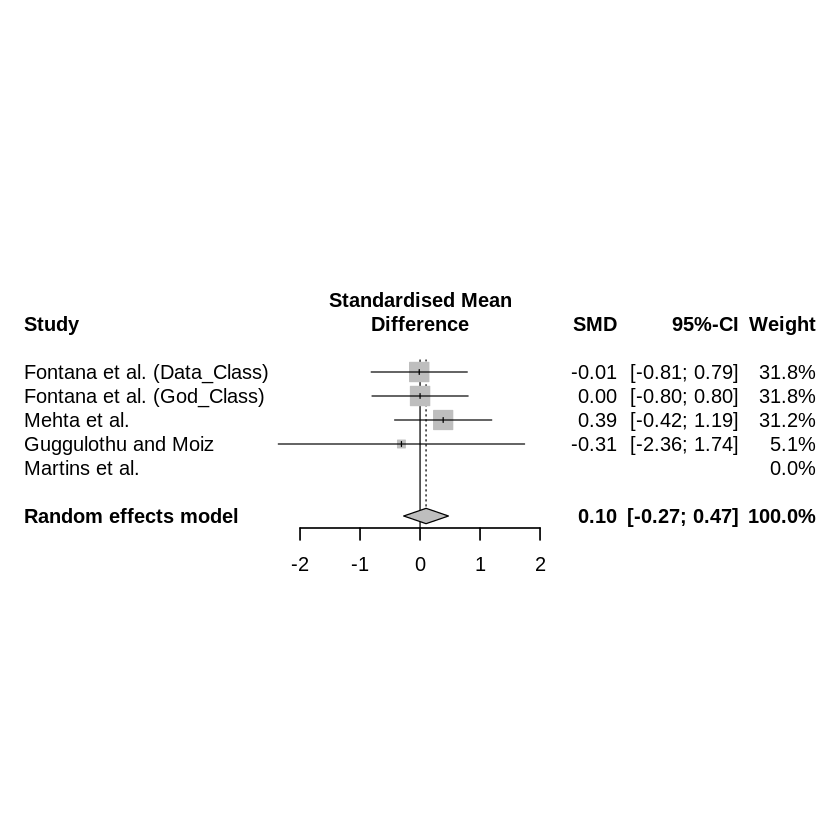

In [8]:
ma_random <- metacont(
                  n.c = our_data$num_methods_before,
                  mean.c = our_data$mean_before,
                  sd.c = our_data$std_before,
                  label.c = 'Before Refactoring',
                  n.e = our_data$num_methods_after,
                  mean.e = our_data$mean_after,
                  sd.e = our_data$std_after,
                  label.e = 'After Refactoring',
                  studlab = our_data$Study,
                  common = FALSE,
                  random = TRUE,
                  method.tau = "SJ",
                  method.random.ci = TRUE,
                  prediction = FALSE,
                  sm = "SMD",
                  warn=FALSE,
                  print.I2 = FALSE,
                  details=FALSE,
                  pooled.events=FALSE,
                  pooled.totals=FALSE,
                  pooled.times=FALSE,
                  study.results=FALSE,
                  print.tau2=FALSE,
                  test.overall.random=FALSE,
                  print.stat=FALSE,
                  details=FALSE,
                  bottom.lr=FALSE
                  )


forest(ma_random, leftcols=c("studlab"),
                  print.I2.ci=FALSE,
                  print.tau2.ci=FALSE,
                  overall.hetstat=FALSE,
                  print.tau=FALSE,
                  print.tau.ci=FALSE,
                  print.Q=FALSE,
                  print.pval.Q=FALSE)

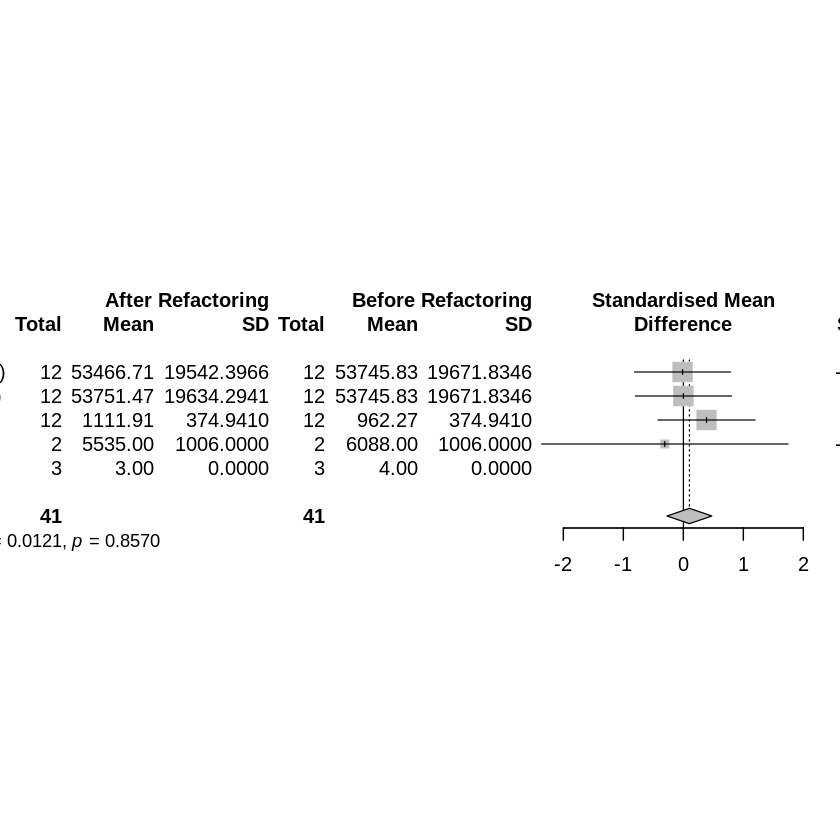

In [9]:
forest(ma_random, layout = "meta", prediction=FALSE)

In [10]:
svg("before_after_refactoring_short.svg", width=20, height=8)
forest(ma_random, leftcols=c("studlab"),
                  print.I2.ci=FALSE,
                  print.tau2.ci=FALSE,
                  overall.hetstat=FALSE,
                  print.tau=FALSE,
                  print.tau.ci=FALSE,
                  print.Q=FALSE,
                  print.pval.Q=FALSE)
dev.off()

pdf 
  2

In [11]:
svg("before_after_refactoring_all.svg", width=12, height=5)
forest(ma_random, test.overall.random=TRUE)
dev.off()

pdf 
  2